<a href="https://colab.research.google.com/github/RishabGuggali/Marketing-Campaign-for-Banking-Products/blob/master/Marketing_Campaign_for_Banking_Products.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#            **Marketing Campaign for Banking Products**

**Discription for the dataset:**
 
The dataset is related to the Banking sector where a bank  having information of about 5000 liability customers wants to benefit from the information to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors). The data includes customer demographic information (age, income, etc.), the customer's relationship with the bank (mortgage, securities account, etc.), and the customer response to the last personal loan campaign (Personal Loan) which saw a healthy conversion rate of 9.6% i.e., 480 out of 5000 liablility customers opted for personal loans.

**Main objective:**

 Now, the retail department of the bank wants to build a machine learning model in order devise campaigns with better target marketing to increase the success ratio with minimal budget. The model should help them identify the potential customers who have a higher probability of purchasing the loan which will eventually increase their success ratio at the reduced campaign cost.

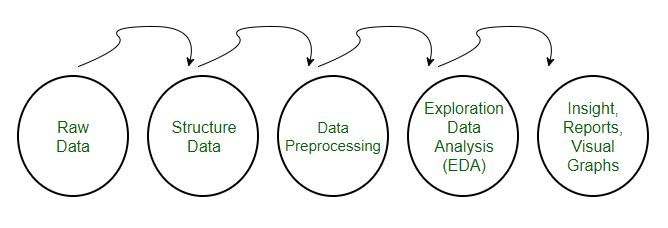

#**STEP 1:** Import the datasets and libraries, check datatype, statistical summary, shape, null values etc

In [ ]:
# Importing Libraries
import pandas as pd              # Reading CSV files
import numpy as np               # Matematical operations on ararys
import matplotlib.pyplot as plt  # Plotting graphs
import seaborn as sns            # Visualisations
from sklearn.preprocessing import PowerTransformer # Reducing the skweness of data
from sklearn.model_selection import train_test_split ## For train-test split
from sklearn.naive_bayes import GaussianNB # For Naive Bayes classifier
from sklearn.linear_model import LogisticRegression # For logistic Regression
from sklearn.ensemble import RandomForestClassifier # For random forest classifier
from sklearn.neighbors import KNeighborsClassifier # For k-nearest neighbors classifier
from sklearn.svm import SVC # For support vector machine
from sklearn.tree import DecisionTreeClassifier # For decision tree classifier
from sklearn.metrics import precision_score, recall_score,plot_confusion_matrix, plot_roc_curve, plot_precision_recall_curve # getting methods for confusion matrix, F1 score, Accuracy Score

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# Reading the dataset
df=pd.read_csv('Bank_Personal_Loan_Modelling.csv')  
# Displaying the first 5 row of dataframe
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [ ]:
#Displaying thge last 5 rows of dataframe
df.tail()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.8,1,0,0,0,0,1,1


In [ ]:
# To check all the datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


Data type of column 'CCAvg' is float64, whereas remaining attributes are of type int64

In [ ]:
# Finding Statistical summary
df.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [ ]:
# Shape of the dataset
df.shape

(5000, 14)

In [ ]:
# Checking if there are any null values
df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

One can see that, there are no missing values in any of the column attributes

#**STEP 2:**Check if you need to clean the data for any of the variables

**Insights about data cleaning**

* 'Experience' column shows presence of negative entries (min=-3) which is wrong and needs to be handled appropriately. 
* Remaining numeric columns such as Age, Income, CCAvg,
Mortgage seem to be fine and no data cleaning is required

*   The customer ages are in the range of 23 to 67 with average age as 45. Quarter of the customer population is below 35.
*  Columns with binary information such as Securities Account, CD Account, Online, CreditCard, Personal Loan are also clean.








**2.1: Dropping irrelevant coloumns**
 
We can see that the min of Experience column is -3. As experience cannot be negative and it is faulty data so we need to clean it.we can observe that as the age increases the experince increses. So let's check the correlation between them.

In [ ]:
# Finding the correlation between experience and age
df['Experience'].corr(df['Age'])

0.9942148569683321

As correlation is 0.99 the age and experience column are highly correlated. So will drop the experience column and keep the age as it is.
As the ID column has no any relationship with the target i.e the **personal loan**. So will drop the ID column.

In [ ]:
# Dropping the less revelence column
df=df.drop(['ID','Experience'],axis=1)
# Displaying the first 5 rows of dataframe
df.head()

,Age,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,49,91107,4,1.6,1,0,0,1,0,0,0
1,45,34,90089,3,1.5,1,0,0,1,0,0,0
2,39,11,94720,1,1.0,1,0,0,0,0,0,0
3,35,100,94112,1,2.7,2,0,0,0,0,0,0
4,35,45,91330,4,1.0,2,0,0,0,0,0,1


# **STEP 3:**EDA: Study the data distribution in each attribute and target variable, share your findings.   


In this section, we will use Exploratory Data Analysis (EDA) tools and Applied Statistics concepts to verify the significance of each independent attribute towards predicting probability of a cutomer for buying the personal loan.

In [ ]:
# Finding all the datatypes of each columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 5000 non-null   int64  
 1   Income              5000 non-null   int64  
 2   ZIP Code            5000 non-null   int64  
 3   Family              5000 non-null   int64  
 4   CCAvg               5000 non-null   float64
 5   Education           5000 non-null   int64  
 6   Mortgage            5000 non-null   int64  
 7   Personal Loan       5000 non-null   int64  
 8   Securities Account  5000 non-null   int64  
 9   CD Account          5000 non-null   int64  
 10  Online              5000 non-null   int64  
 11  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 468.9 KB


By closely observing the data and description given about each column attribute we can say that:

*   **Numeric data columns (Interval or Ratio):** Age,Experience, Income, Mortgage and CCAvg

* **Ordinal Categorical columns**: Family and Education

* **Nominal Categorical columns**: ID, ZIP Code, Securities Account, CD Account, Online, CreditCard, Personal Loan 











**3.1: Number of unique in each column?**

In [ ]:
# getting the unique values of each columns
df.nunique()

Age                    45
Income                162
ZIP Code              467
Family                  4
CCAvg                 108
Education               3
Mortgage              347
Personal Loan           2
Securities Account      2
CD Account              2
Online                  2
CreditCard              2
dtype: int64

In [ ]:
# Dropping the less revelence column
df=df.drop(['ZIP Code'],axis=1)
# Displaying the first 5 rows of dataframe
df.head()

,Age,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,49,4,1.6,1,0,0,1,0,0,0
1,45,34,3,1.5,1,0,0,1,0,0,0
2,39,11,1,1.0,1,0,0,0,0,0,0
3,35,100,1,2.7,2,0,0,0,0,0,0
4,35,45,4,1.0,2,0,0,0,0,0,1


In [ ]:
df.shape

(5000, 11)

**3.2: Number of people with zero mortgage?**

In [ ]:
# Finding the number of people with zero mortage
mortgage_counts=df['Mortgage'].value_counts()
print(" Number of people with zero mortgage are",mortgage_counts[0])

 Number of people with zero mortgage are 3462


**3.3: Number of people with zero credit card spending per month?**

In [ ]:
# Finding the number of people with zero credit card spending per month
credit_counts=df['CCAvg'].value_counts()
print(" Number of people with zero credit card spending are",credit_counts[0])

 Number of people with zero credit card spending are 106


  **3.4: Value counts of all categorical columns**

In [ ]:
# value counts of family column
df['Family'].value_counts()

1    1472
2    1296
4    1222
3    1010
Name: Family, dtype: int64

In [ ]:
# value counts of education column
df['Education'].value_counts()


1    2096
3    1501
2    1403
Name: Education, dtype: int64

In [ ]:
# value counts of securities account column
df['Securities Account'].value_counts()

0    4478
1     522
Name: Securities Account, dtype: int64

In [ ]:
# value count of creditcard column
df['CreditCard'].value_counts()
 

0    3530
1    1470
Name: CreditCard, dtype: int64

In [ ]:
# value count of cd account column
df['CD Account'].value_counts()

0    4698
1     302
Name: CD Account, dtype: int64

In [ ]:
# value count of online column
df['Online'].value_counts()

1    2984
0    2016
Name: Online, dtype: int64

**3.5: Univariate and Bivariate analysis**

**Univariate Analysis**

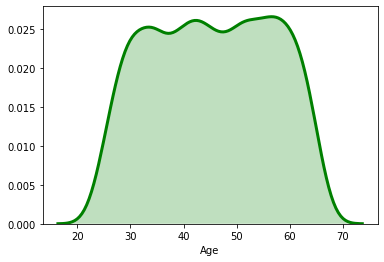

In [ ]:
# checking for distribution in age column
sns.distplot(df['Age'], hist = False, kde = True,color='g',kde_kws = {'shade': True, 'linewidth': 3});

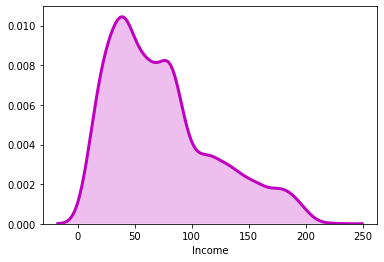

In [ ]:
# Checking foir distribution in income column
sns.distplot(df['Income'], hist = False, kde = True,color="m",kde_kws = {'shade': True, 'linewidth': 3});

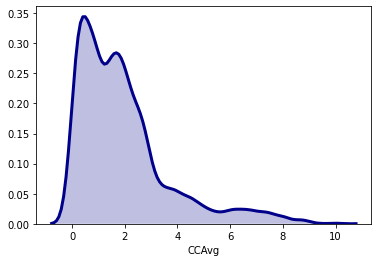

In [ ]:
# Checking foir distribution in ccavg column
sns.distplot(df['CCAvg'], hist = False, kde = True,color='darkblue',kde_kws = {'shade': True, 'linewidth': 3});

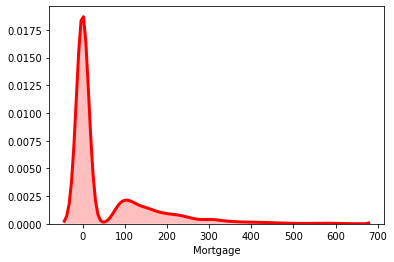

In [ ]:
# Checking foir distribution in mortagage column
sns.distplot(df['Mortgage'], hist = False, kde = True,color='red',kde_kws = {'shade': True, 'linewidth': 3});

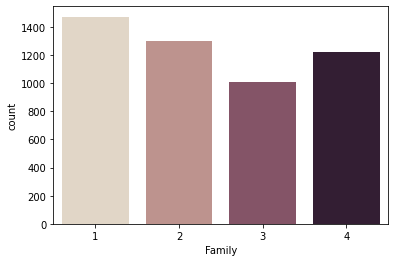

In [ ]:
# Count plot for family column
sns.countplot(x=df.Family, palette= "ch:.25");

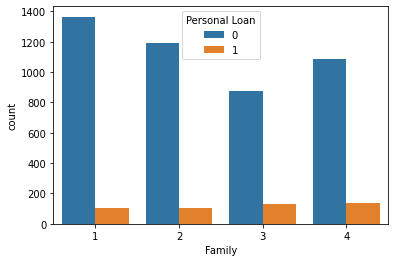

In [ ]:

sns.countplot(x='Family',hue='Personal Loan',data=df);

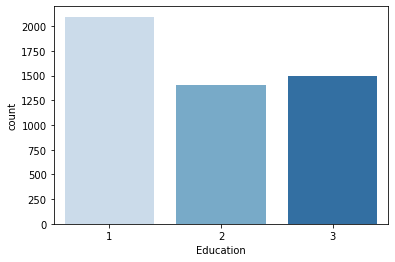

In [ ]:
# Count plot for education column
sns.countplot(x=df['Education'], palette="Blues");

In each education category, one can see that customers with higher the income tend to buy personal Loans.

**Mutivariate Analysis**

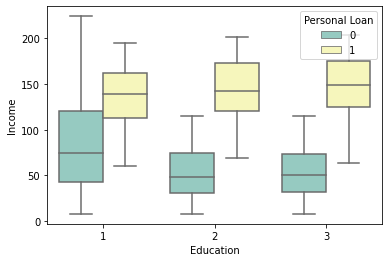

In [ ]:
# Analysing  how income education depend on personal loan
sns.boxplot(x='Education',y='Income',hue='Personal Loan',data=df,palette="Set3");

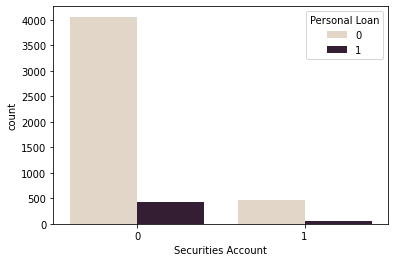

In [ ]:
# looking how securities accountvary with personal loan
sns.countplot(x='Securities Account', palette='ch:.25',hue='Personal Loan',data=df);

Customers with Securities account have slightly higher percentage of buying the personal loan than the customers with no Securities account

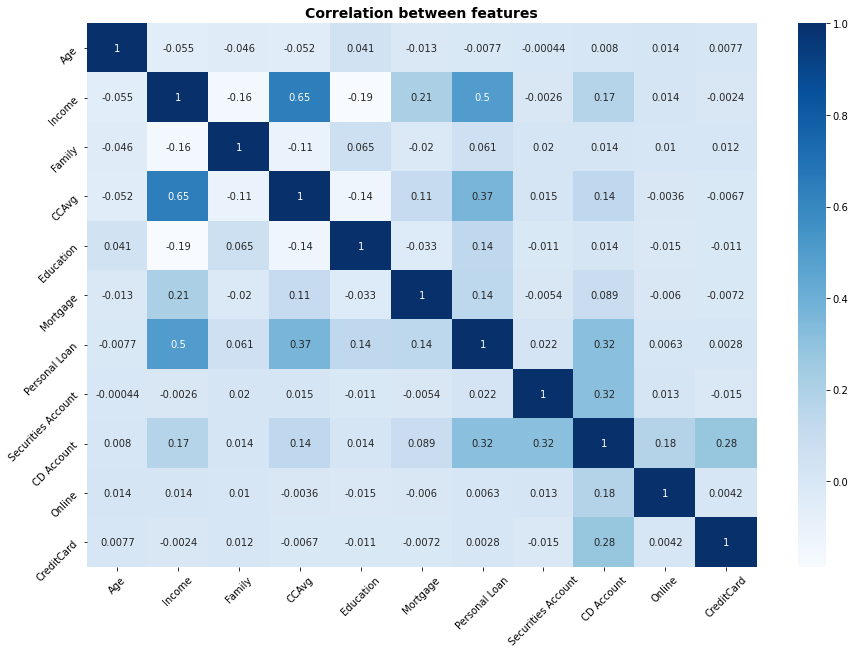

In [ ]:
# Plotting the correlation  between the features 
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True,cmap="Blues")
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.title("Correlation between features", weight='bold',fontsize=14)
plt.show()

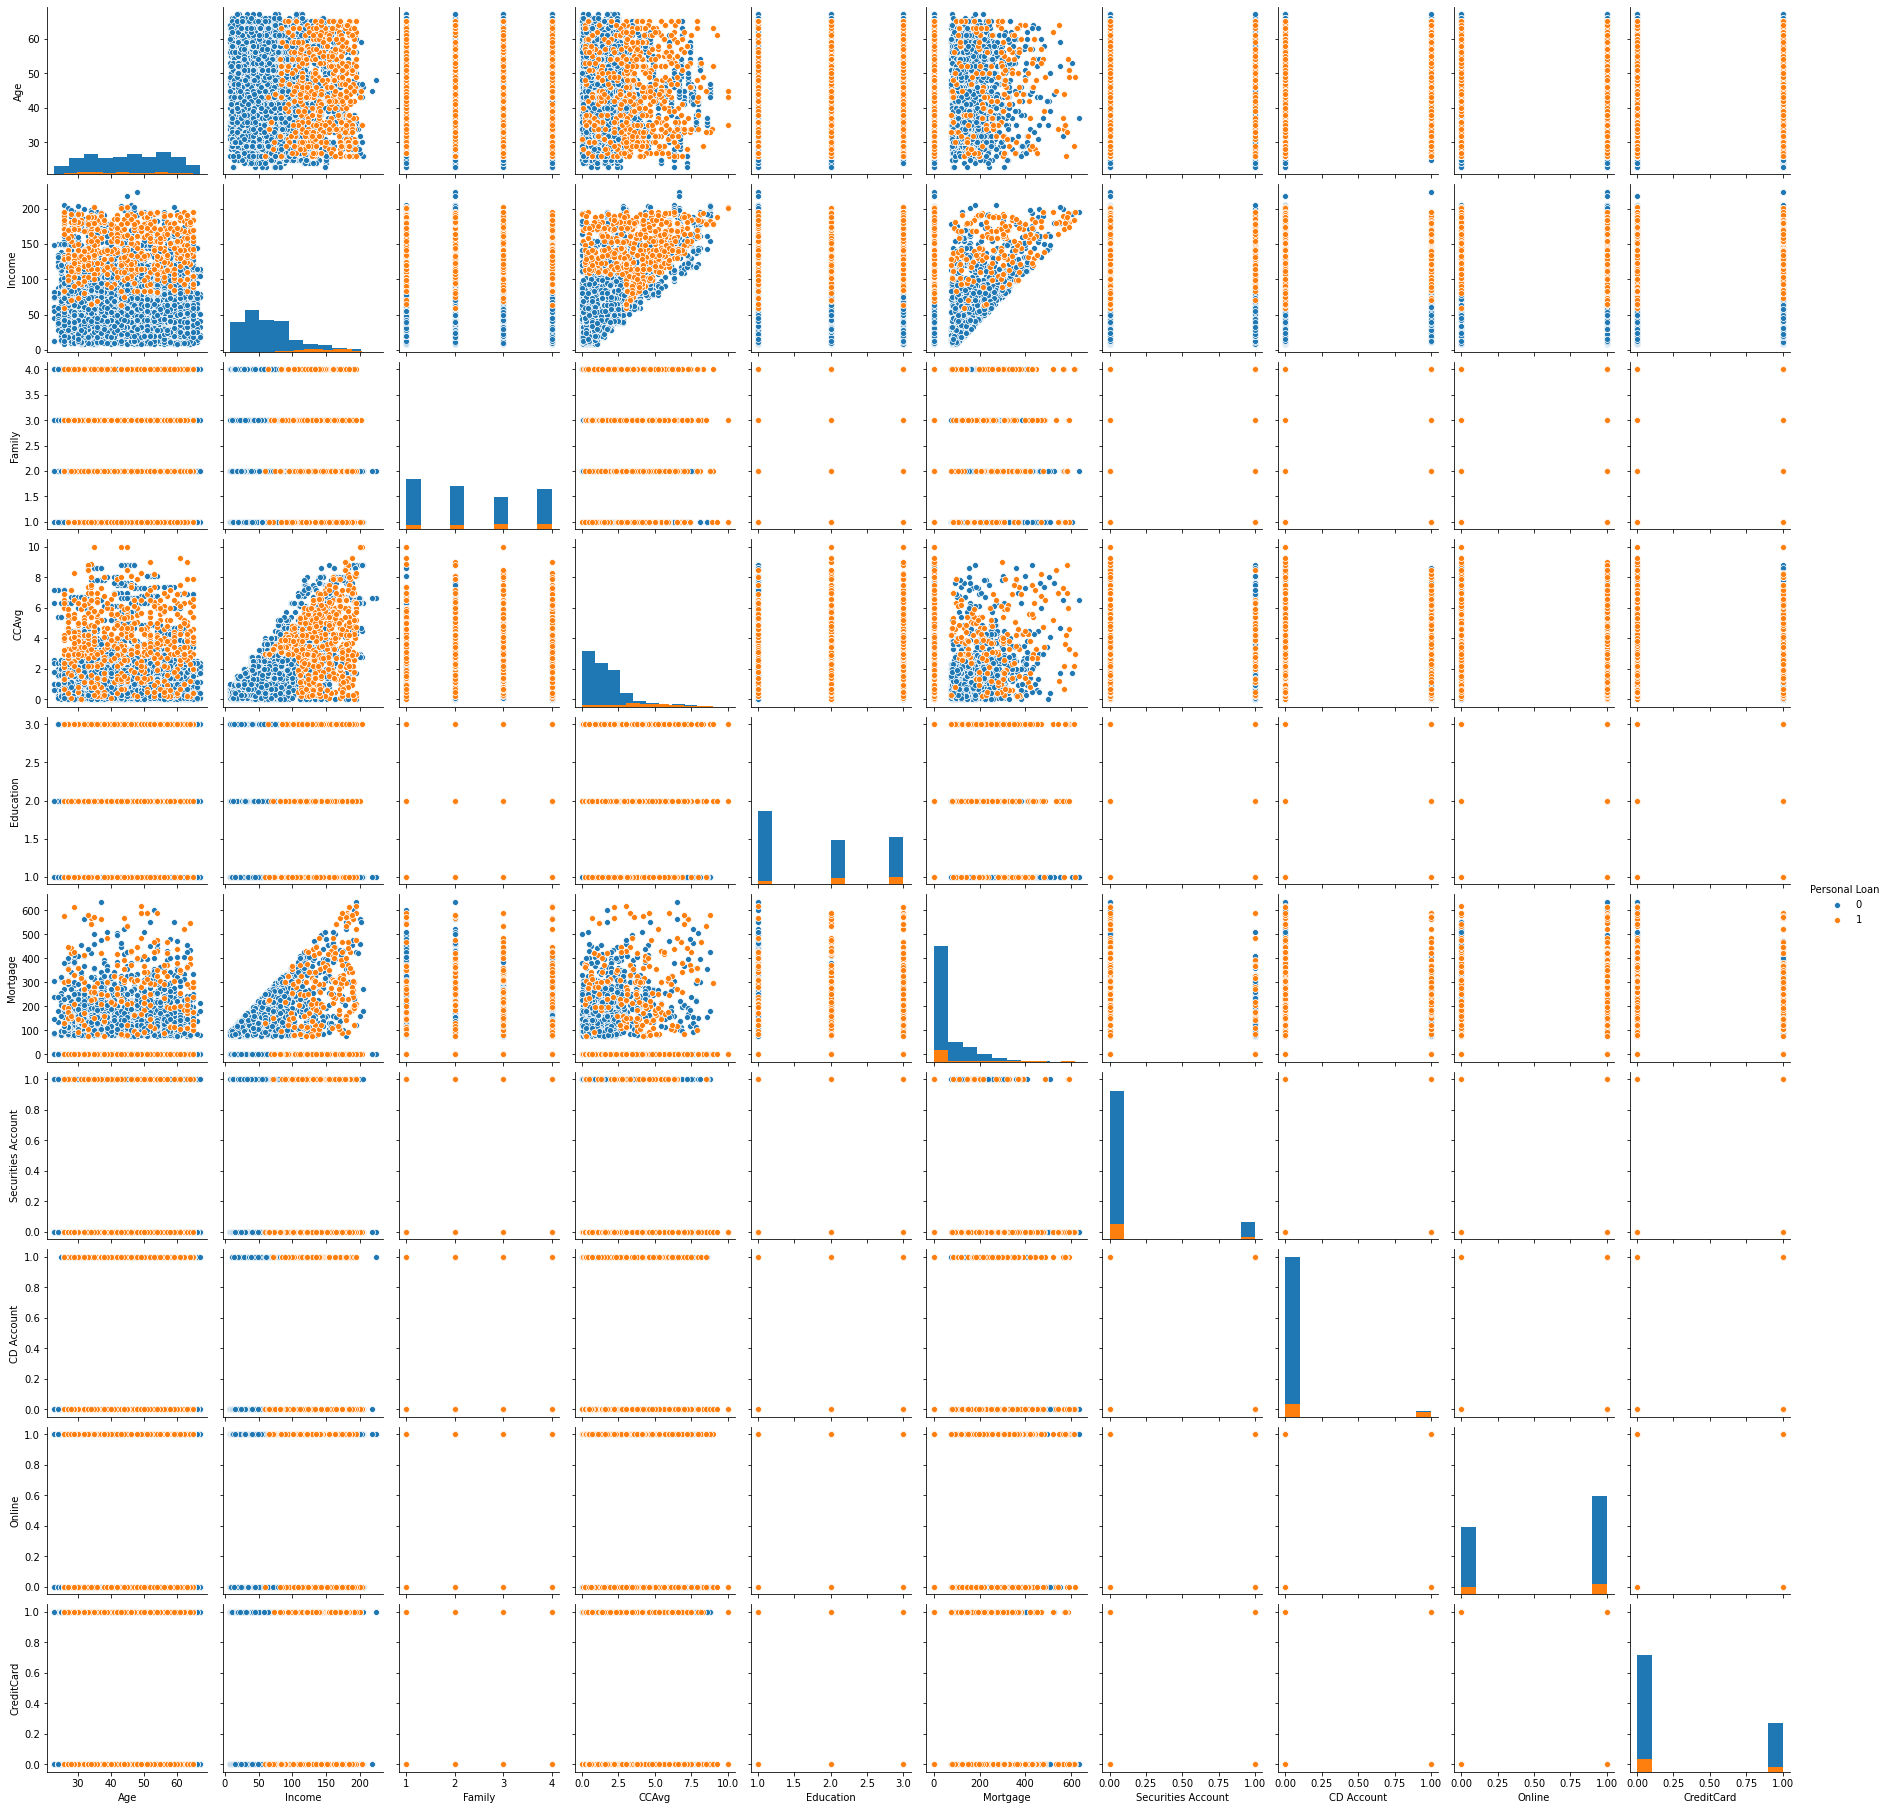

In [ ]:
sns.pairplot(df,hue='Personal Loan',diag_kind='hist');

**Observations**

->Age has a positive linear relationship with Experience

->Income, CCAvg, Mortgage histograms are not normally distributed


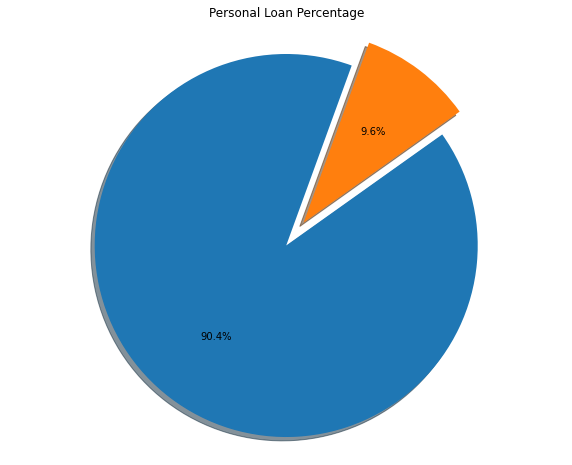

In [ ]:
DF=pd.DataFrame(df['Personal Loan'].value_counts()).reset_index()
DF.columns=['Labels','Personal Loan']
fig1,ax1=plt.subplots(figsize=(10,8))
explode=(0,0.15)
ax1.pie(DF['Personal Loan'],explode=explode,autopct='%1.1f%%',shadow=True,startangle=70)
ax1.axis('equal')
plt.title('Personal Loan Percentage')
plt.show()


One can see that, 9.6% of the total customers bought the personal loan in the previous campaign

Observation: Clearly, there is a high amount of class imbalance in the target attribute..!

#**STEP 4:** Apply necessary transformations for the feature variables 

**PowerTransformer** applies a power transformation to each feature to make the data more Gaussian-like. Currently, PowerTransformer implements the Yeo-Johnson and Box-Cox transforms. The power transform finds the optimal scaling factor to stabilize variance and mimimize skewness through maximum likelihood estimation. By default, PowerTransformer also applies zero-mean, unit variance normalization to the transformed output. Note that Box-Cox can only be applied to strictly positive data.if negative values are present the Yeo-Johnson transformed is to be preferred.

In [ ]:
df.columns

Index(['Age', 'Income', 'Family', 'CCAvg', 'Education', 'Mortgage',
       'Personal Loan', 'Securities Account', 'CD Account', 'Online',
       'CreditCard'],
      dtype='object')

In [ ]:
x=df.drop(['Personal Loan'],axis=1)
x

,Age,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
0,25,49,4,1.6,1,0,1,0,0,0
1,45,34,3,1.5,1,0,1,0,0,0
2,39,11,1,1.0,1,0,0,0,0,0
3,35,100,1,2.7,2,0,0,0,0,0
4,35,45,4,1.0,2,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
4995,29,40,1,1.9,3,0,0,0,1,0
4996,30,15,4,0.4,1,85,0,0,1,0
4997,63,24,2,0.3,3,0,0,0,0,0
4998,65,49,3,0.5,2,0,0,0,1,0


In [ ]:
y = df['Personal Loan']
y

0       0
1       0
2       0
3       0
4       0
       ..
4995    0
4996    0
4997    0
4998    0
4999    0
Name: Personal Loan, Length: 5000, dtype: int64

(5000, 1)


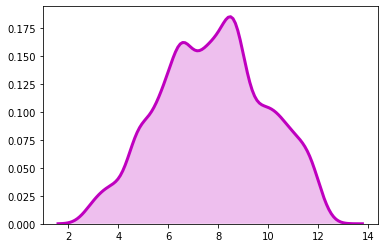

In [ ]:
pt=PowerTransformer(method='box-cox',standardize=False)
pt.fit(x["Income"].values.reshape(-1,1))
temp=pt.transform(x['Income'].values.reshape(-1,1))
print(temp.shape)
sns.distplot(temp, hist = False, kde = True,color='m',kde_kws = {'shade': True, 'linewidth': 3});

(5000, 1)


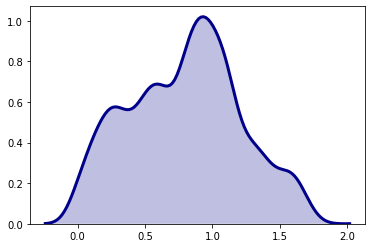

In [ ]:
pt=PowerTransformer(method='yeo-johnson',standardize=False)
pt.fit(x["CCAvg"].values.reshape(-1,1))
temp=pt.transform(x['CCAvg'].values.reshape(-1,1))
print(temp.shape)
sns.distplot(temp, hist = False, kde = True,color='darkblue',kde_kws = {'shade': True, 'linewidth': 3});

In [ ]:
x['Mortgage Int']= pd.cut(x['Mortgage'],bins=[0,100,200,300,400,500,600,700],labels=[0,1,2,3,4,5,6],include_lowest=True)
x.drop('Mortgage',axis=1,inplace=True)
x

,Age,Income,Family,CCAvg,Education,Securities Account,CD Account,Online,CreditCard,Mortgage Int
0,25,49,4,1.6,1,1,0,0,0,0
1,45,34,3,1.5,1,1,0,0,0,0
2,39,11,1,1.0,1,0,0,0,0,0
3,35,100,1,2.7,2,0,0,0,0,0
4,35,45,4,1.0,2,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
4995,29,40,1,1.9,3,0,0,1,0,0
4996,30,15,4,0.4,1,0,0,1,0,0
4997,63,24,2,0.3,3,0,0,0,0,0
4998,65,49,3,0.5,2,0,0,1,0,0


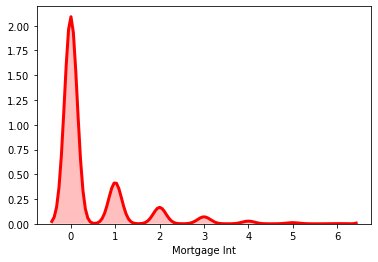

In [ ]:
# Checking for distribution in mortagage column
#temp=(x['Mortgage Int'].values.reshape(-1,1))
sns.distplot(x['Mortgage Int'], hist = False, kde = True,color='red',kde_kws = {'shade': True, 'linewidth': 3});

#**STEP 5:**. Normalise your data and split the data into training and test set in the ratio of 70:30 respectively 

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3,stratify=y, random_state = 0 )

#**STEP 6:** Use the Logistic Regression model to predict the likelihood of a customer buying personal loans. 




## **Logistic Regression**

In [ ]:
log_reg = LogisticRegression(C=1.0, max_iter=1000)
log_reg.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
class_name = ['non loan takers', 'loan taker']

In [ ]:
y_pred_logi = log_reg.predict(x_test)

#**STEP 7:** Print all the metrics related for evaluating the model performance 

In [ ]:
train_score1 = log_reg.score(x_train,y_train)
print('Training Accuracy:', train_score1)
test_score1 = log_reg.score(x_test, y_test)
print('Testing Accuracy:', test_score1)

Training Accuracy: 0.9525714285714286
Testing Accuracy: 0.9493333333333334


In [ ]:
precision_logi = precision_score(y_test, y_pred_logi, labels=class_name)
print('Precision:', precision_logi)
recall_logi = recall_score(y_test, y_pred_logi)
print('Recall:', recall_logi)


Precision: 0.8148148148148148
Recall: 0.6111111111111112


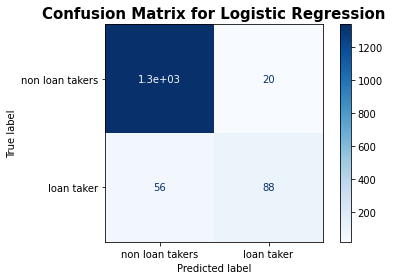

In [ ]:
plot_confusion_matrix(log_reg, x_test, y_test, display_labels=class_name,cmap=plt.cm.Blues);
plt.title('Confusion Matrix for Logistic Regression',fontsize=15,fontweight='bold');

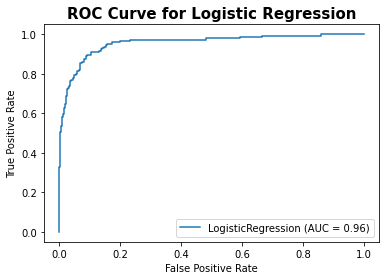

In [ ]:

plot_roc_curve(log_reg, x_test, y_test);
plt.title('ROC Curve for Logistic Regression',fontsize=15,fontweight='bold');

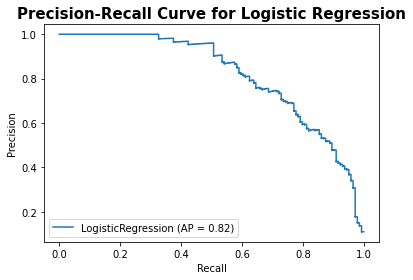

In [ ]:
plot_precision_recall_curve(log_reg, x_test, y_test);
plt.title('Precision-Recall Curve for Logistic Regression',fontsize=15,fontweight='bold');

#**STEP 8:** Build various other classification algorithms and compare their performance

##**Navie Bayes**

In [ ]:
# create model using constructor
NBModel = GaussianNB()

In [ ]:
# fit the model to training set
NBModel.fit(x_train,y_train)
# Predict the test data to get y_pred
y_pred = NBModel.predict(x_test)

In [ ]:
train_score2 = NBModel.score(x_train,y_train)
print('Training Accuracy:', train_score2)
test_score2 = NBModel.score(x_test, y_test)
print('Testing Accuracy:', test_score2)

Training Accuracy: 0.8805714285714286
Testing Accuracy: 0.8873333333333333


In [ ]:
precision_NB = precision_score(y_test, y_pred, labels=class_name)
print('Precision:', precision_NB)
recall_NB = recall_score(y_test, y_pred)
print('Recall:', recall_NB)

Precision: 0.43781094527363185
Recall: 0.6111111111111112


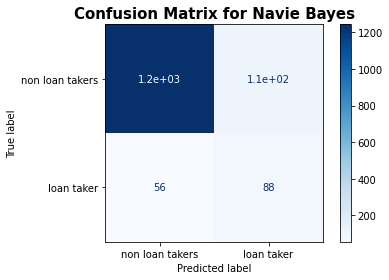

In [ ]:
plot_confusion_matrix(NBModel, x_test, y_test, display_labels=class_name,cmap=plt.cm.Blues);
plt.title('Confusion Matrix for Navie Bayes',fontsize=15,fontweight='bold');

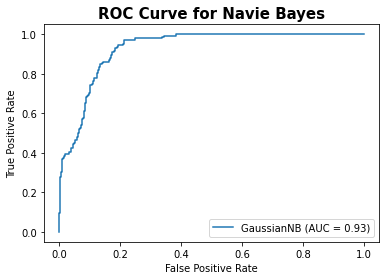

In [ ]:
plot_roc_curve(NBModel, x_test, y_test);
plt.title('ROC Curve for Navie Bayes',fontsize=15,fontweight='bold');

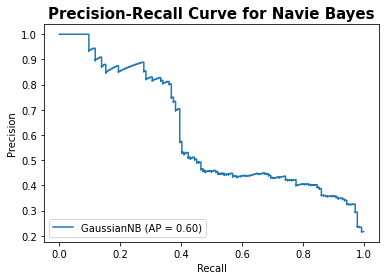

In [ ]:
plot_precision_recall_curve(NBModel, x_test, y_test);
plt.title('Precision-Recall Curve for Navie Bayes',fontsize=15,fontweight='bold');

##**K-NN**

In [ ]:
# create model using constructor
knn= KNeighborsClassifier(n_neighbors= 15,weights ='uniform',metric='euclidean')
# fit the model to training set
knn.fit(x_train,y_train)
# Predict the test data to get y_pred
y_pred=knn.predict(x_test)

In [ ]:
train_score3 = knn.score(x_train,y_train)
print('Training Accuracy:', train_score3)
test_score3 = knn.score(x_test, y_test)
print('Testing Accuracy:', test_score3)

Training Accuracy: 0.9277142857142857
Testing Accuracy: 0.9206666666666666


In [ ]:
precision_knn = precision_score(y_test, y_pred, labels=class_name)
print('Precision:', precision_knn)
recall_knn = recall_score(y_test, y_pred)
print('Recall:', recall_knn)

Precision: 0.6623376623376623
Recall: 0.3541666666666667


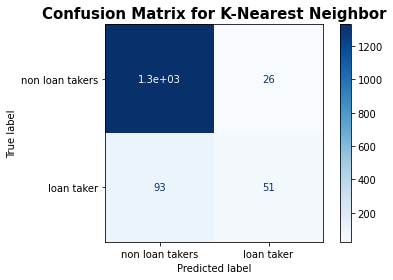

In [ ]:
plot_confusion_matrix(knn, x_test, y_test, display_labels=class_name,cmap=plt.cm.Blues);
plt.title('Confusion Matrix for K-Nearest Neighbor',fontsize=15,fontweight='bold');

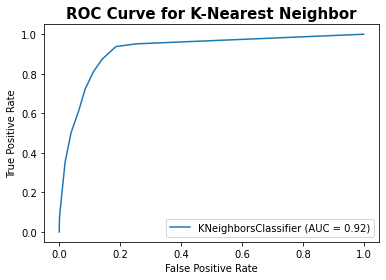

In [ ]:
plot_roc_curve(knn, x_test, y_test);
plt.title('ROC Curve for K-Nearest Neighbor',fontsize=15,fontweight='bold');

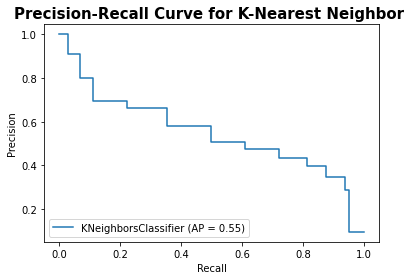

In [ ]:
plot_precision_recall_curve(knn, x_test, y_test);
plt.title('Precision-Recall Curve for K-Nearest Neighbor ',fontsize=15,fontweight='bold');

## **Decision tree**

In [ ]:
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)
y_pred=dt.predict(x_test)

In [ ]:
train_score4 = dt.score(x_train,y_train)
print('Training Accuracy:', train_score4)
test_score4 = dt.score(x_test, y_test)
print('Testing Accuracy:', test_score4)

Training Accuracy: 1.0
Testing Accuracy: 0.9826666666666667


In [ ]:
precision_dt = precision_score(y_test, y_pred, labels=class_name)
print('Precision:', precision_dt)
recall_dt = recall_score(y_test, y_pred)
print('Recall:', recall_dt)

Precision: 0.9097222222222222
Recall: 0.9097222222222222


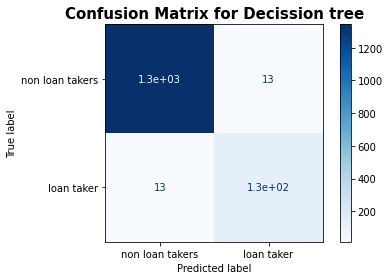

In [ ]:
plot_confusion_matrix(dt, x_test, y_test, display_labels=class_name,cmap=plt.cm.Blues);
plt.title('Confusion Matrix for Decission tree',fontsize=15,fontweight='bold');

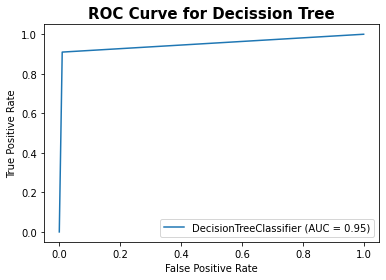

In [ ]:
plot_roc_curve(dt, x_test, y_test);
plt.title('ROC Curve for Decission Tree',fontsize=15,fontweight='bold');

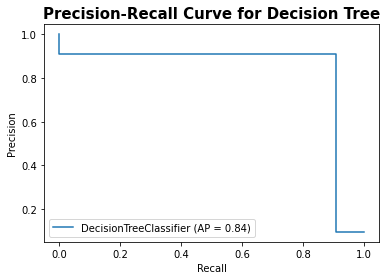

In [ ]:
plot_precision_recall_curve(dt, x_test, y_test);
plt.title('Precision-Recall Curve for Decision Tree',fontsize=15,fontweight='bold');

## **Random Forest**

In [ ]:
rf = RandomForestClassifier(n_estimators=100, max_depth=7,n_jobs=-1, random_state=1)
rf.fit(x_train, y_train)
y_pred=rf.predict(x_test)

In [ ]:
train_score5 = rf.score(x_train,y_train)
print('Training Accuracy:', train_score5)
test_score5 = rf.score(x_test, y_test)
print('Testing Accuracy:', test_score5)

Training Accuracy: 0.9937142857142857
Testing Accuracy: 0.9866666666666667


In [ ]:
precision_rf = precision_score(y_test, y_pred, labels=class_name)
print('Precision:', precision_rf)
recall_rf = recall_score(y_test, y_pred)
print('Recall:', recall_rf)

Precision: 0.984375
Recall: 0.875


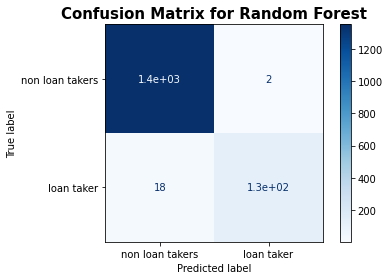

In [ ]:
plot_confusion_matrix(rf, x_test, y_test, display_labels=class_name,cmap=plt.cm.Blues);
plt.title('Confusion Matrix for Random Forest',fontsize=15,fontweight='bold');

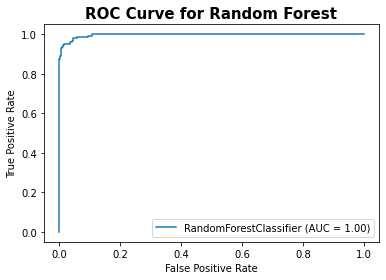

In [ ]:
plot_roc_curve(rf, x_test, y_test);
plt.title('ROC Curve for Random Forest',fontsize=15,fontweight='bold');

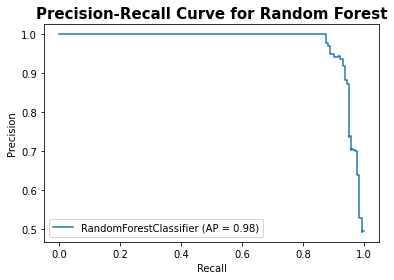

In [ ]:
plot_precision_recall_curve(rf, x_test, y_test);
plt.title('Precision-Recall Curve for Random Forest',fontsize=15,fontweight='bold');

## **Support Vector Machine**

In [ ]:
# create model using constructor
SVMModel = SVC() # Calling default constructor
# fit the model to training set
SVMModel.fit(x_train,y_train)
# Predict the test data to get y_pred
y_pred = SVMModel.predict(x_test)

In [ ]:
train_score6 = SVMModel.score(x_train,y_train)
print('Training Accuracy:', train_score6)
test_score6 = SVMModel.score(x_test, y_test)
print('Testing Accuracy:', test_score6)

Training Accuracy: 0.9048571428571428
Testing Accuracy: 0.9046666666666666


In [ ]:
precision_svm = precision_score(y_test, y_pred, labels=class_name)
print('Precision:', precision_svm)
recall_svm = recall_score(y_test, y_pred)
print('Recall:', recall_svm)

Precision: 1.0
Recall: 0.006944444444444444


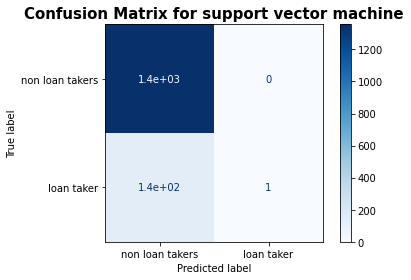

In [ ]:
plot_confusion_matrix(SVMModel, x_test, y_test, display_labels=class_name,cmap=plt.cm.Blues);
plt.title('Confusion Matrix for support vector machine',fontsize=15,fontweight='bold');

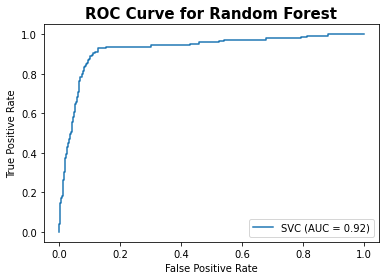

In [ ]:
plot_roc_curve(SVMModel, x_test, y_test);
plt.title('ROC Curve for Random Forest',fontsize=15,fontweight='bold');

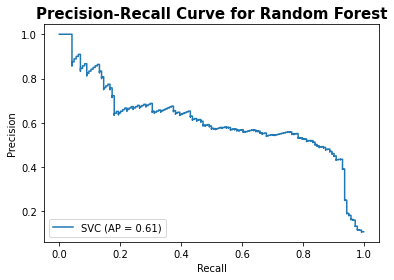

In [ ]:
plot_precision_recall_curve(SVMModel, x_test, y_test);
plt.title('Precision-Recall Curve for Random Forest',fontsize=15,fontweight='bold');

## **Performance of algorithms implemented**

In [ ]:
test_score=[test_score1,test_score2,test_score3,test_score4,test_score5,test_score6]
classifiers=['Logistic Regression','Navie bayes classifier','K-Nearest Neighbor classifier','Decission tree classifier','Random Forest Classifier','Support Vector Machine']
print(test_score)
print(classifiers)

[0.9493333333333334, 0.8873333333333333, 0.9206666666666666, 0.9826666666666667, 0.9866666666666667, 0.9046666666666666]
['Logistic Regression', 'Navie bayes classifier', 'K-Nearest Neighbor classifier', 'Decission tree classifier', 'Random Forest Classifier', 'Support Vector Machine']


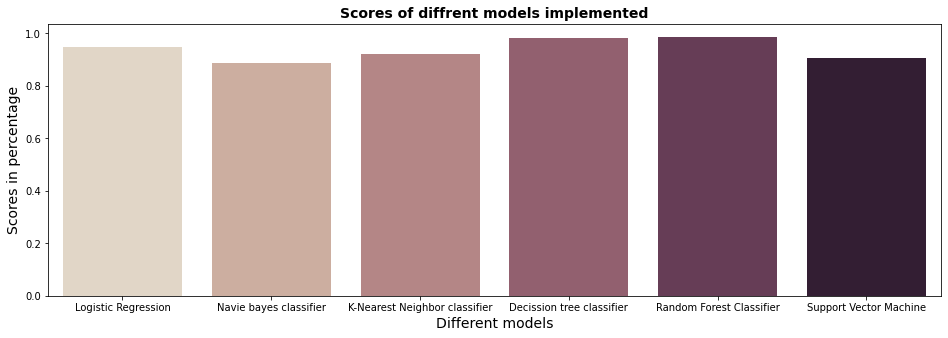

In [ ]:
plt.figure(figsize=(16,5))
sns.barplot(classifiers,test_score, palette= "ch:.25")
plt.title("Scores of diffrent models implemented", weight='bold',fontsize=14)
plt.xlabel("Different models",fontsize=14)
plt.ylabel("Scores in percentage",fontsize=14)
plt.show()

From the above performance graph of different models implemented Finally, **Random forest classifier** is the winner of the race!! . **Decision tree classifier** Model work good enough !.


#**STEP 9:**Give a business understanding of your model 

Below are following insights for the models

->Income plays a major role in predicting whether a customer will take loan or not. Usually people with Income between 120K - 170K dollars, tend to take loans.

->Customers with education level 2 and 3 are more likely to take loans as compared to the customers with education level 1.

->Customers with credit cards are also more likely to take a loan.

->Customers with certificate of deposit accounts are more likely to take a loan.

->Customers without securites account, are more likely to take a loan.

->Customers with average credit card spending between 3k - 5k dollars per month are more likely to take a loan.
